<a href="https://colab.research.google.com/github/subhadipm08/Resnet50/blob/main/ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Input,Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.models import Sequential

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Input,Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.models import Sequential

def resudial_block(x,filters,kernel_size=3, stride=1):
  shotcut=x

  x=Conv2D(filters,kernel_size=1,strides=stride,padding='same')(x)
  x=BatchNormalization()(x)
  x=layers.Activation('relu')(x)

  x=Conv2D(filters,kernel_size=kernel_size,strides=1,padding='same')(x) # stride should be 1 here
  x=BatchNormalization()(x)
  x=layers.Activation('relu')(x)

  x=Conv2D(filters*4,kernel_size=1,strides=1,padding='same')(x) # kernel_size should be 1 here
  x=BatchNormalization()(x)

  if shotcut.shape[-1]!=filters*4 or stride > 1: # Added condition for stride
    shotcut=Conv2D(filters*4,kernel_size=1,strides=stride,padding='same')(shotcut)
    shotcut=BatchNormalization()(shotcut)

  x = layers.add([x,shotcut])
  x = layers.Activation('relu')(x)

  return x

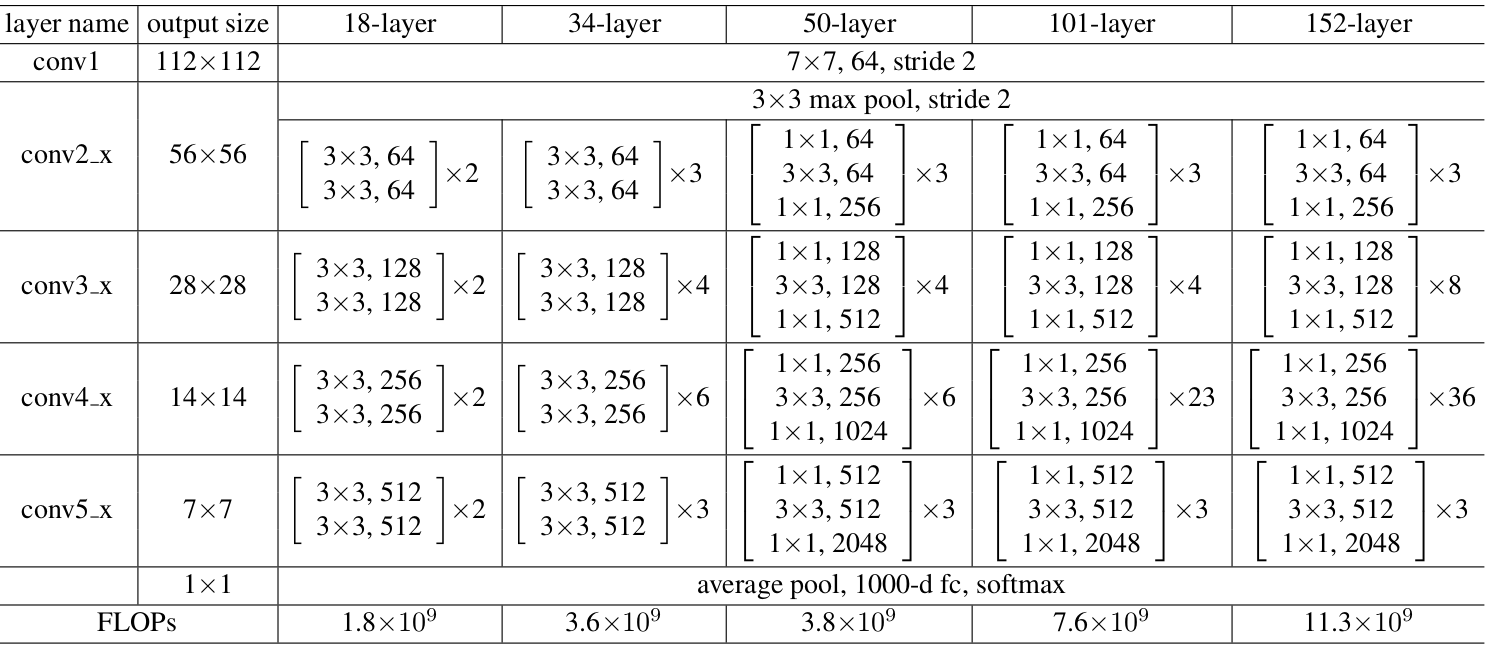

In [ ]:
def build_resnet50(input_shape=(224,224,3),n_classes=1000):
  input = Input(shape=input_shape)
  x = layers.Rescaling(1./255)(input)

  # initial conv block
  x=Conv2D(64,kernel_size=7,strides=2,padding='same')(x)
  x=BatchNormalization()(x)
  x=layers.Activation('relu')(x)
  x=MaxPooling2D(pool_size=3,strides=2,padding='same')(x)

  #Block 2
  x=resudial_block(x,filters=64)
  x=resudial_block(x,filters=64)
  x=resudial_block(x,filters=64)

  #Block 3
  x=resudial_block(x,filters=128,stride=2)
  x=resudial_block(x,filters=128)
  x=resudial_block(x,filters=128)
  x=resudial_block(x,filters=128)

  #Block 4
  x=resudial_block(x,filters=256,stride=2)
  x=resudial_block(x,filters=256)
  x=resudial_block(x,filters=256)
  x=resudial_block(x,filters=256)
  x=resudial_block(x,filters=256)
  x=resudial_block(x,filters=256)

  #Block5
  x=resudial_block(x,filters=512,stride=2)
  x=resudial_block(x,filters=512)
  x=resudial_block(x,filters=512)

  #Global Avg Pooling Layer
  x=layers.GlobalAveragePooling2D()(x)
  x=Dense(n_classes,activation='softmax')(x)

  model = keras.models.Model(input,x)
  return model

In [ ]:
model_resnet = build_resnet50(n_classes=10)

In [ ]:
model_resnet.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_3         │ (None, 224, 224,  │          0 │ input_layer_3[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_29 (Conv2D)  │ (None, 112, 112,  │      9,472 │ rescaling_3[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 112, 112,  │        256 │ conv2d_29[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_25       │ (None, 112, 112,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 56, 56,    │          0 │ activation_25[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_30 (Conv2D)  │ (None, 56, 56,    │      4,160 │ max_pooling2d_3[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_30[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_26       │ (None, 56, 56,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_31 (Conv2D)  │ (None, 56, 56,    │     36,928 │ activation_26[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_31[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_27       │ (None, 56, 56,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_32 (Conv2D)  │ (None, 56, 56,    │     16,640 │ activation_27[0]… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_33 (Conv2D)  │ (None, 56, 56,    │     16,640 │ max_pooling2d_3[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │      1,024 │ conv2d_32[0][0]   │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │      1,024 │ conv2d_33[0][0]   │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_7 (Add)         │ (None, 56, 56,    │          0 │ batch_normalizat

 Total params: 23,608,202 (90.06 MB)

 Trainable params: 23,555,082 (89.86 MB)

 Non-trainable params: 53,120 (207.50 KB)